In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [28]:
df=[]
for i in range(8):
    df.append(pd.read_csv(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA Cluster - SSTA Category & SSTA 8 Clusters\SSTA Cluster {i} - SSTA Category & SSTA 8 Clusters.csv",index_col=0))

In [76]:
from sklearn.model_selection import train_test_split

x_trains=[None for i in range(8)]
y_trains=[None for i in range(8)]
x_tests=[None for i in range(8)]
y_tests=[None for i in range(8)]



for i in range(8):
    x_trains[i],x_tests[i],y_trains[i],y_tests[i]=train_test_split(df[i].drop(['Cluster Number'],axis=1)
                                                                   ,df[i]['Cluster Number'],test_size=0.1,random_state=42)

In [77]:
y_tests

[29    0
 27    0
 Name: Cluster Number, dtype: int64,
 96    1
 92    1
 Name: Cluster Number, dtype: int64,
 98     2
 107    2
 Name: Cluster Number, dtype: int64,
 0     3
 48    3
 34    3
 Name: Cluster Number, dtype: int64,
 56    4
 59    4
 Name: Cluster Number, dtype: int64,
 66    5
 71    5
 Name: Cluster Number, dtype: int64,
 103    6
 113    6
 87     6
 Name: Cluster Number, dtype: int64,
 17    7
 Name: Cluster Number, dtype: int64]

In [78]:
y_trains

[1     0
 23    0
 13    0
 4     0
 2     0
 31    0
 11    0
 22    0
 5     0
 21    0
 Name: Cluster Number, dtype: int64,
 40    1
 91    1
 81    1
 69    1
 68    1
 97    1
 79    1
 86    1
 78    1
 82    1
 Name: Cluster Number, dtype: int64,
 36     2
 110    2
 84     2
 95     2
 63     2
 44     2
 121    2
 83     2
 88     2
 99     2
 72     2
 85     2
 Name: Cluster Number, dtype: int64,
 6     3
 50    3
 26    3
 74    3
 42    3
 20    3
 24    3
 55    3
 47    3
 64    3
 54    3
 15    3
 37    3
 75    3
 33    3
 38    3
 49    3
 67    3
 32    3
 Name: Cluster Number, dtype: int64,
 14    4
 77    4
 45    4
 53    4
 30    4
 18    4
 80    4
 41    4
 52    4
 57    4
 65    4
 39    4
 51    4
 Name: Cluster Number, dtype: int64,
 19    5
 73    5
 58    5
 62    5
 35    5
 25    5
 76    5
 46    5
 61    5
 70    5
 43    5
 60    5
 Name: Cluster Number, dtype: int64,
 115    6
 106    6
 104    6
 109    6
 89     6
 118    6
 100    6
 90     6
 1

In [79]:
x_train=pd.concat([x_trains[0],x_trains[1],x_trains[2],x_trains[3],x_trains[4],x_trains[5],x_trains[6],x_trains[7]])
x_test=pd.concat([x_tests[0],x_tests[1],x_tests[2],x_tests[3],x_tests[4],x_tests[5],x_tests[6],x_tests[7]])
y_train=pd.concat([y_trains[0],y_trains[1],y_trains[2],y_trains[3],y_trains[4],y_trains[5],y_trains[6],y_trains[7]])
y_test=pd.concat([y_tests[0],y_tests[1],y_tests[2],y_tests[3],y_tests[4],y_tests[5],y_tests[6],y_tests[7]])

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 6, 1, 2, 2, 0, 3, 3, 5, 4, 5, 5, 6, 6, 6, 7], dtype=int64)

In [82]:
y_array=y_test.values.ravel()
y_array

array([0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7], dtype=int64)

In [83]:
accuracy_score(y_pred,y_array)

0.8235294117647058

In [84]:
clusters=[]
for i in range(1,9):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA 8 Clusters Images\SSTA 8 Clusters Indian Rainfall Images\SSTA 8 Clusters {i} INDIAN RAINFALL.png"))
    

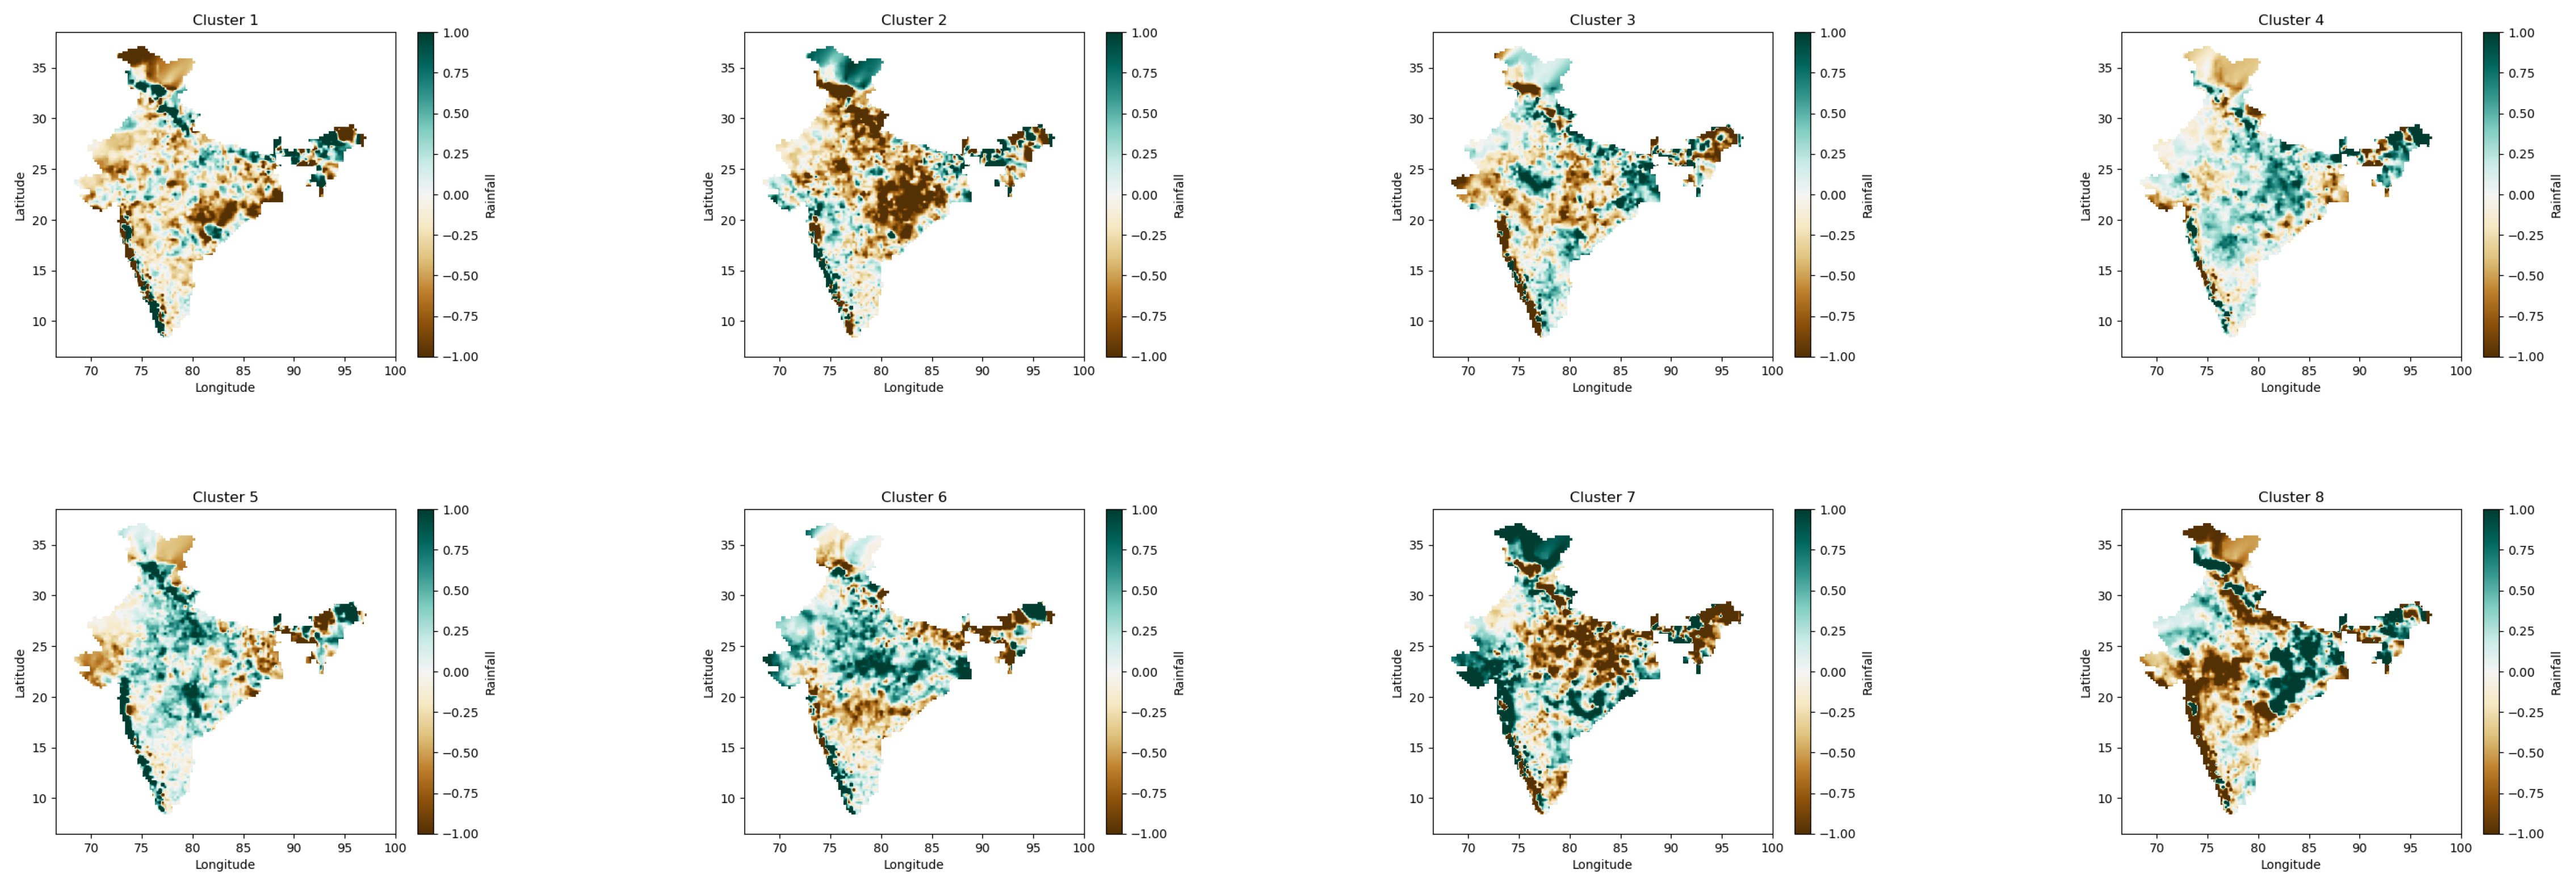

In [85]:
fig, axes = plt.subplots(2, 4, figsize=(60, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [86]:
indexes_list = y_test.index.tolist()
indexes_list

[29, 27, 96, 92, 98, 107, 0, 48, 34, 56, 59, 66, 71, 103, 113, 87, 17]

In [87]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

In [92]:
print("Predicted Cluster",y_pred)
print("Actual Cluster",y_array)

Predicted Cluster [0 0 6 1 2 2 0 3 3 5 4 5 5 6 6 6 7]
Actual Cluster [0 0 1 1 2 2 3 3 3 4 4 5 5 6 6 6 7]


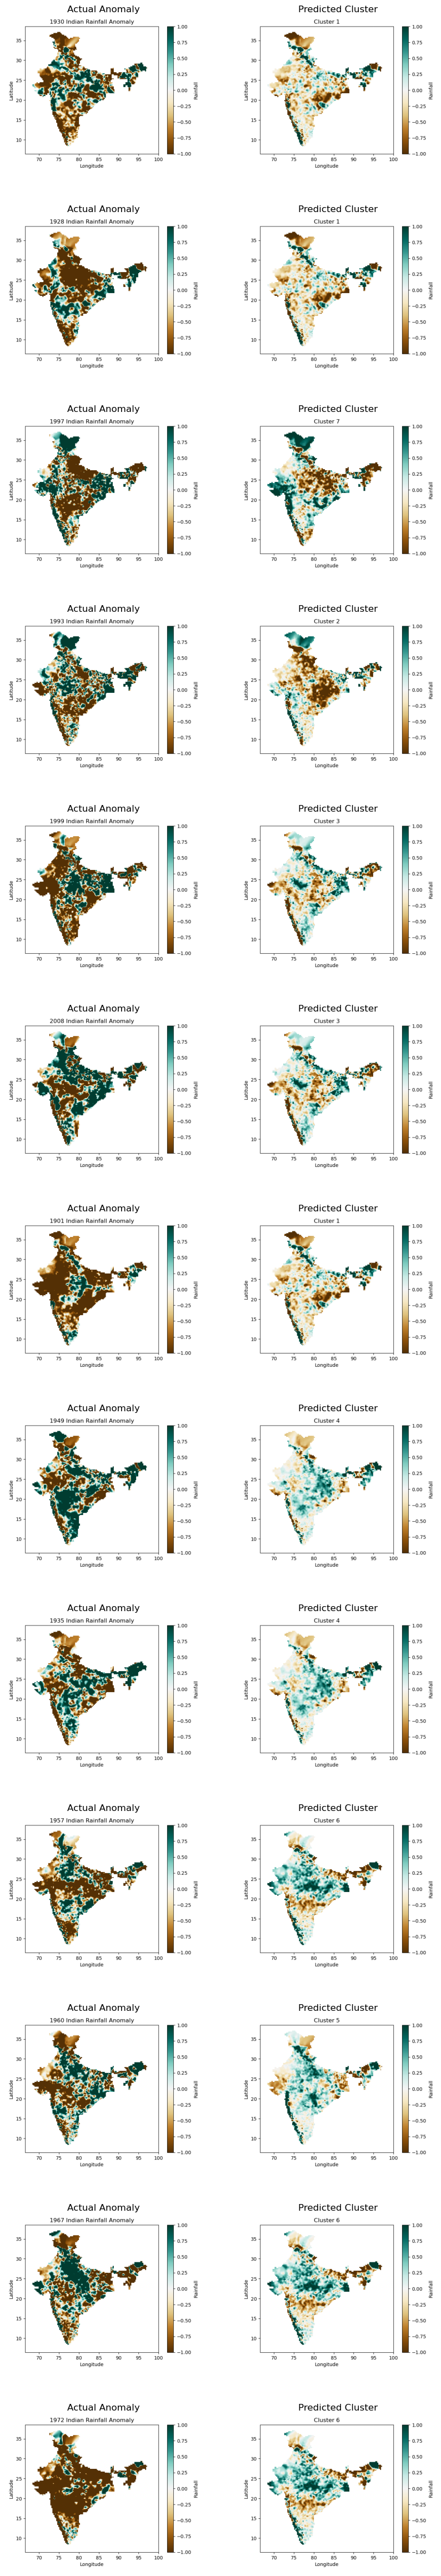

In [94]:
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


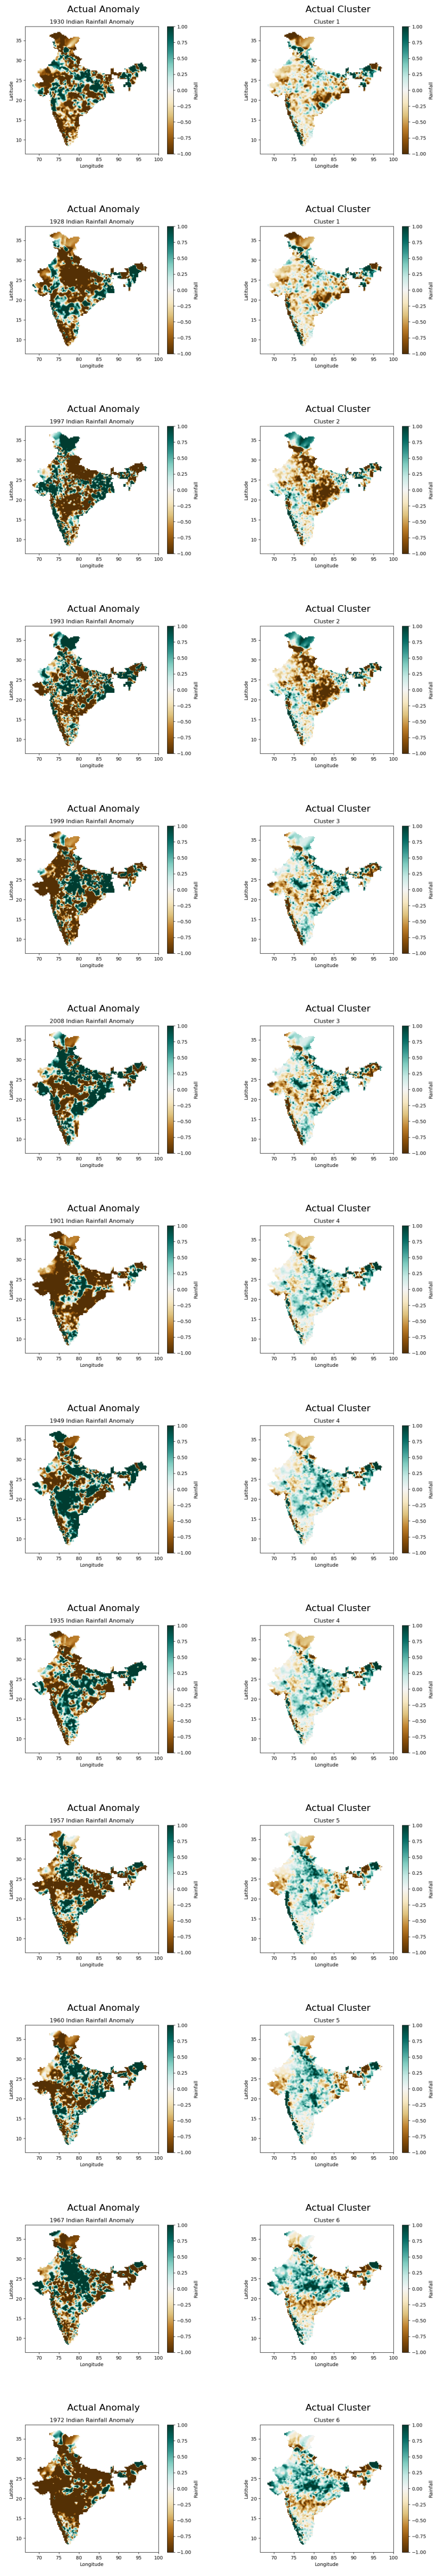

In [95]:
#Actual Years
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

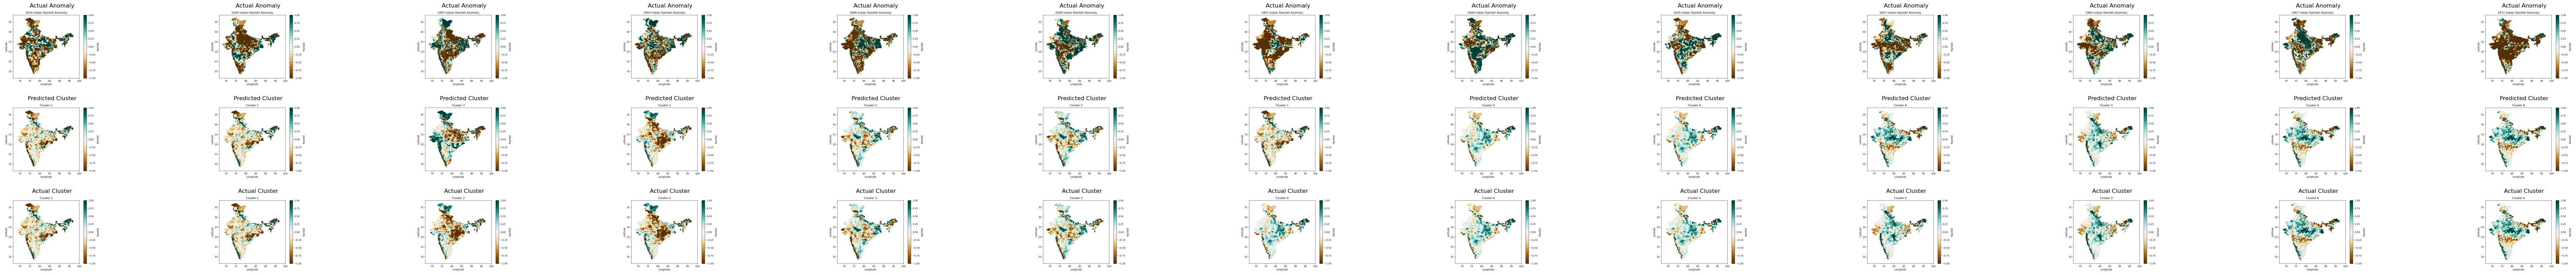

In [96]:
fig, axes = plt.subplots(3, 13, figsize=(100, 10)) 
j=0
k=0
l=0
for i, ax in enumerate(axes.ravel()):
    
   
    if(i>=0 and i<13):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')
        j+=1
        
    elif(i>=13 and i<26):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        k+=1
    elif(i>=26):
        pred_clus=y_array[l]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        l+=1
        
#     print(i,j,k,l)

# plt.savefig('SSTA 8 Clusters CART Precise Selection Prediction.png')
